# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


In [3]:
data = pd.read_csv("/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv'

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("RdBu")


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [5]:
data = pd.read_csv("dataset/Student_Performance.csv")

In [6]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
data.info()
data.isna().sum() / data.shape[0]
data.shape
data.duplicated().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


np.True_

In [12]:
data.describe(include = object)

,Extracurricular Activities
count,10000
unique,2
top,No
freq,5052


In [13]:
# create function to visualized categorical column using count plot

def count_plot(column_name, hue = None, rotation = 0):
    graph = sns.countplot(x = column_name, data = data, hue = hue, order = data[column_name].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)
        
        
    plt.xticks(rotation = rotation)
    plt.show()

In [14]:
def box_plot(x_axis = None, y_axis = None, hue = None, col = None):
    sns.catplot(x = x_axis, y = y_axis, data = data, hue = hue, kind = "box", col = col)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()

In [15]:
data["Hours Studied"].unique()

array([7, 4, 8, 5, 3, 6, 2, 1, 9])

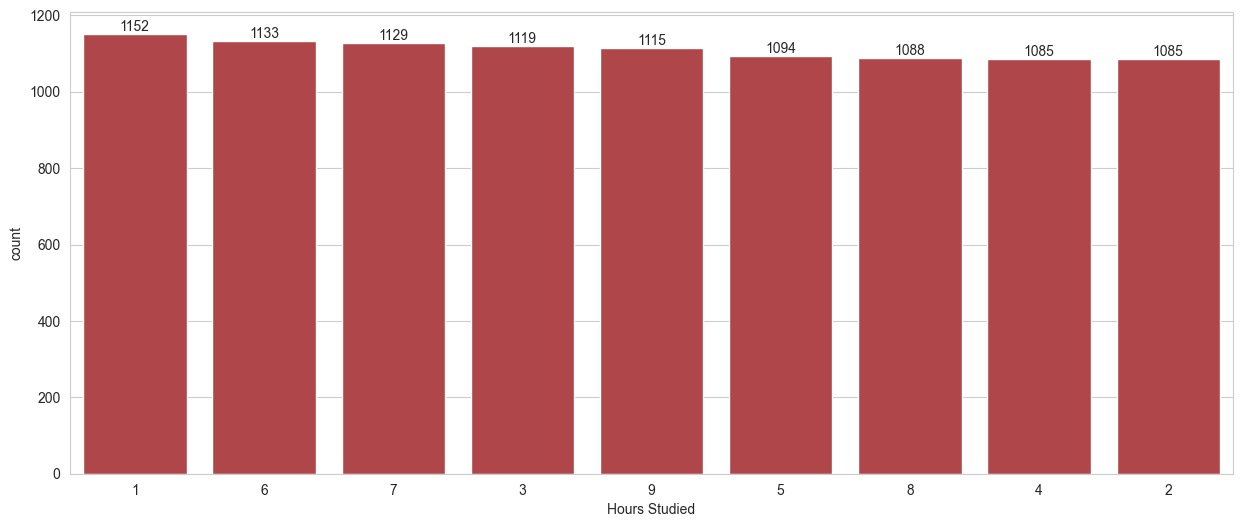

In [16]:
plt.figure(figsize = (15,6))
count_plot(column_name = "Hours Studied") 

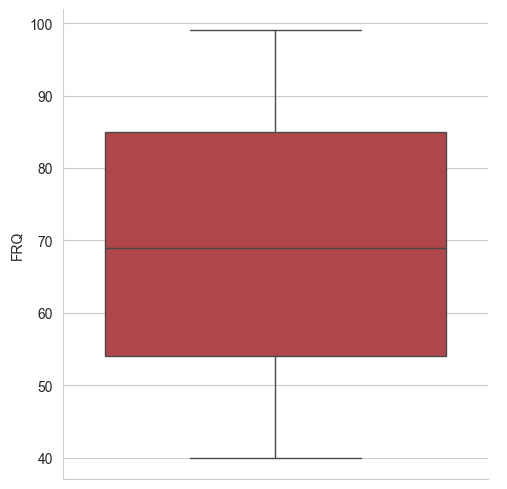

In [17]:
box_plot(y_axis = "Previous Scores") 

In [18]:
data["Extracurricular Activities"].unique()

array(['Yes', 'No'], dtype=object)

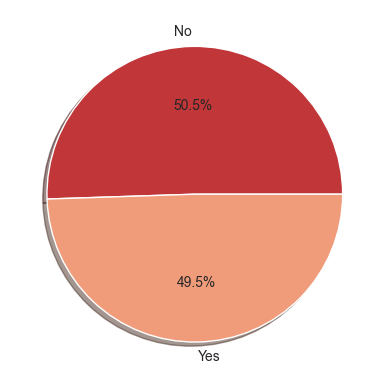

In [19]:
plt.pie(data["Extracurricular Activities"].value_counts(), labels = data["Extracurricular Activities"].value_counts().index, 
        shadow = True, autopct = "%1.1f%%")
plt.show()

In [ ]:
data["Sleep Hours"].unique()
plt.figure(figsize = (15,6))
count_plot(column_name = "Sleep Hours")

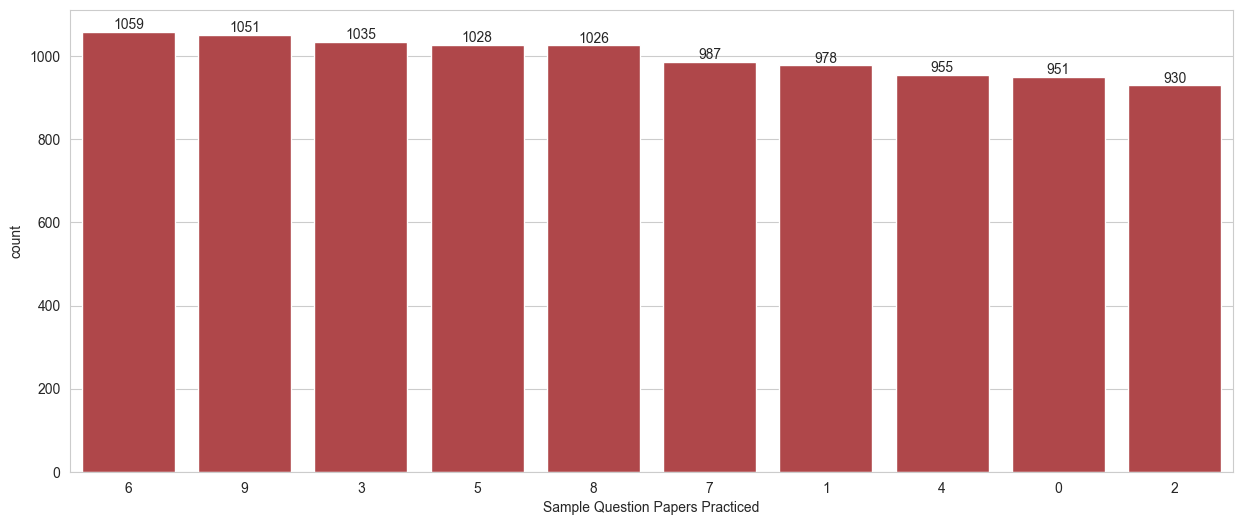

In [21]:
data["Sample Question Papers Practiced"].unique()
plt.figure(figsize = (15,6))
count_plot(column_name = "Sample Question Papers Practiced")

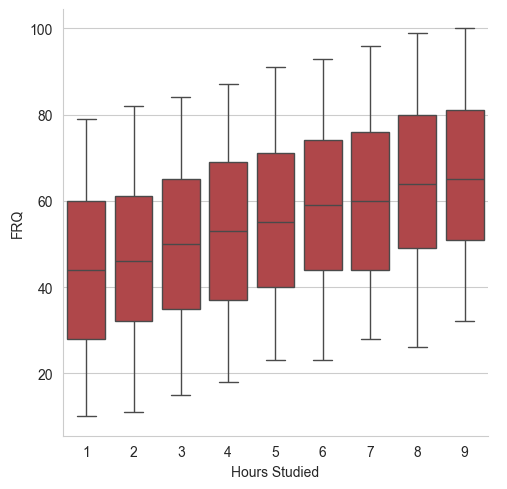

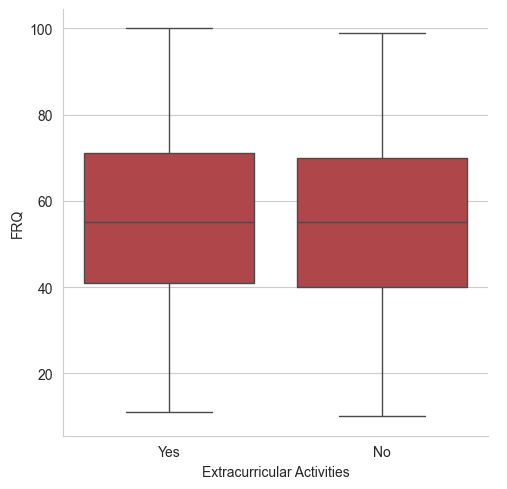

In [22]:
box_plot(x_axis = "Hours Studied", y_axis = "Performance Index") 
box_plot(x_axis = "Extracurricular Activities", y_axis = "Performance Index") 

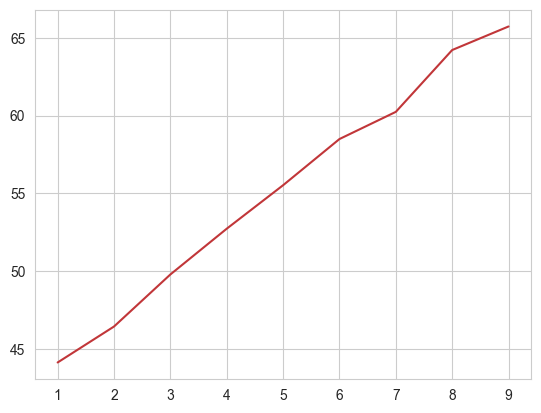

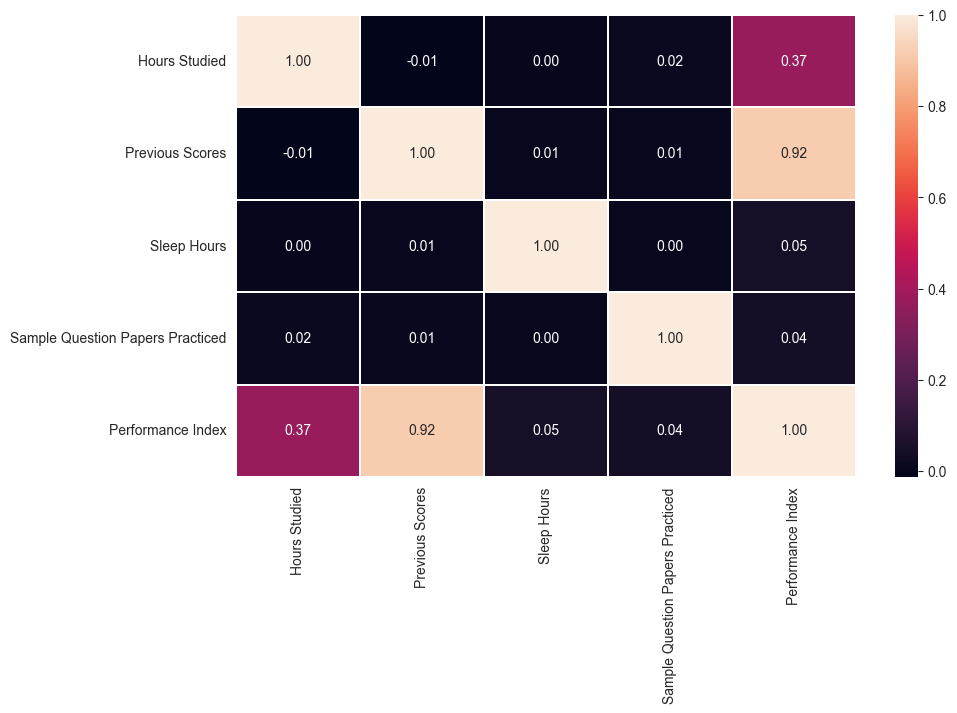

In [23]:
avg_performance_by_hours = data.groupby('Hours Studied')['Performance Index'].mean()
plt.plot(avg_performance_by_hours.index, avg_performance_by_hours.values)
plt.show()

plt.figure(figsize = (10,6))
sns.heatmap(data.select_dtypes(exclude = object).corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
#Type your code here

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [33]:
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [35]:
duplicate_count = data.duplicated().sum()
print("\nJumlah data duplikat:", duplicate_count)

# Jika ada duplikat (opsional)
if duplicate_count > 0:
    data = data.drop_duplicates()
    print("Duplikat dihapus. Shape baru:", data.shape)



Jumlah data duplikat: 127
Duplikat dihapus. Shape baru: (9873, 6)


In [36]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({
    'Yes': 1,
    'No': 0
})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_28612\1658171507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Extracurricular Activities'] = data['Extracurricular Activities'].map({


In [38]:
print("\nEncoding berhasil:")
print(data['Extracurricular Activities'].value_counts())


Encoding berhasil:
Series([], Name: count, dtype: int64)


In [37]:
numerical_features = [
    'Hours Studied',
    'Previous Scores',
    'Sleep Hours',
    'Sample Question Papers Practiced'
]

scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_28612\2792463237.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [39]:
X = data.drop(columns=['Performance Index'])
y = data['Performance Index']

print("\nShape fitur (X):", X.shape)
print("Shape target (y):", y.shape)


Shape fitur (X): (9873, 5)
Shape target (y): (9873,)


In [40]:
display(X.head())
display(y.head())

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,0.775566,1.706168,NaN,1.454025,-1.249715
1,-0.383205,0.724912,NaN,-1.491315,-0.900925
2,1.161822,-1.064438,NaN,0.275889,-0.900925
3,0.003052,-1.006717,NaN,-0.902247,-0.900925
4,0.775566,0.320865,NaN,0.864957,0.145444


0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

In [41]:
data.to_csv("dataset/Student_Performance_Preprocessed.csv", index=False)